In [1]:
import pandas as pd
import numpy as np
from faker import Faker
import random, string
from datetime import datetime, timedelta,date

In [2]:
data= pd.read_csv('vehicle_data.csv')

In [3]:
data

,Unnamed: 0,id,range,Battery Level (%),Latitude (°),Longitude (°),speed,Maintenance Cost ($),Charging Cost ($),Pin Code,...,BC,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats,km
0,0,4,251.5200,77,30.478740,73.848945,112,98,37,539993,...,82.0,4261,1809,1568,2771,2300,447,385,5,149469.0
1,1,4,251.5200,77,30.478740,73.848945,112,98,37,539993,...,82.0,4261,1809,1568,2771,2300,447,385,5,148625.0
2,2,4,181.2000,58,22.732451,88.380553,52,288,9,915957,...,82.0,4261,1809,1568,2771,2300,447,385,5,107323.0
3,3,4,181.2000,58,22.732451,88.380553,52,288,9,915957,...,82.0,4261,1809,1568,2771,2300,447,385,5,107752.0
4,4,4,286.4325,85,9.181629,83.667695,57,186,40,112664,...,82.0,4261,1809,1568,2771,2300,447,385,5,168343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,2,299.4075,89,31.561058,71.854441,46,222,25,486935,...,82.0,4694,1849,1443,2875,2232,388,561,5,174489.0
1996,1996,2,242.4900,75,35.091809,73.938006,94,75,27,991796,...,82.0,4694,1849,1443,2875,2232,388,561,5,138421.0
1997,1997,2,242.4900,75,35.091809,73.938006,94,75,27,991796,...,82.0,4694,1849,1443,2875,2232,388,561,5,142353.0
1998,1998,2,208.8825,64,29.130707,70.236270,98,241,30,830371,...,82.0,4694,1849,1443,2875,2232,388,561,5,121429.0


In [4]:
data1 = data.drop(['km','Unnamed: 0','Maintenance Cost ($)','Charging Cost ($)','id','status','Date','dvr','mgr','Seats','Latitude (°)','Longitude (°)','Pin Code','speed','Working Condition', 'Charging Status','Energy Consumed (kWh)','Fast Charge Speed (kW)'],axis=1)

In [5]:
list(data1)

['range',
 'Battery Level (%)',
 'Make',
 'Acceleration 0 - 100 km/h',
 'Top Speed',
 'ER',
 'Total Power',
 'Total Torque',
 'Drive',
 'BC',
 'Length',
 'Width',
 'Height',
 'Wheelbase',
 'Gross Vehicle Weight (GVWR)',
 'Max. Payload',
 'Cargo Volume']

In [6]:
len(list(data1))

17

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   range                        2000 non-null   float64
 1   Battery Level (%)            2000 non-null   int64  
 2   Make                         2000 non-null   object 
 3   Acceleration 0 - 100 km/h    2000 non-null   float64
 4   Top Speed                    2000 non-null   int64  
 5   ER                           2000 non-null   int64  
 6   Total Power                  2000 non-null   int64  
 7   Total Torque                 2000 non-null   int64  
 8   Drive                        2000 non-null   object 
 9   BC                           2000 non-null   float64
 10  Length                       2000 non-null   int64  
 11  Width                        2000 non-null   int64  
 12  Height                       2000 non-null   int64  
 13  Wheelbase         

In [8]:
data2 = pd.get_dummies(data1,dtype=int)

In [9]:
data2.shape

(2000, 23)

In [10]:
data1.shape

(2000, 17)

In [11]:
data2.head(5)

,range,Battery Level (%),Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,BC,Length,Width,...,Max. Payload,Cargo Volume,Make_BMW,Make_Polestar,Make_Tesla1,Make_Tesla2,Make_Volkswagen,Drive_AWD,Drive_Front,Drive_Rear
0,251.5200,77,7.9,160,450,150,310,82.0,4261,1809,...,447,385,0,0,0,0,1,0,0,1
1,251.5200,77,7.9,160,450,150,310,82.0,4261,1809,...,447,385,0,0,0,0,1,0,0,1
2,181.2000,58,7.9,160,450,150,310,82.0,4261,1809,...,447,385,0,0,0,0,1,0,0,1
3,181.2000,58,7.9,160,450,150,310,82.0,4261,1809,...,447,385,0,0,0,0,1,0,0,1
4,286.4325,85,7.9,160,450,150,310,82.0,4261,1809,...,447,385,0,0,0,0,1,0,0,1


In [12]:
y=data2['range']

In [13]:
x = data2.drop('range',axis=1)

In [14]:
x

,Battery Level (%),Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,BC,Length,Width,Height,...,Max. Payload,Cargo Volume,Make_BMW,Make_Polestar,Make_Tesla1,Make_Tesla2,Make_Volkswagen,Drive_AWD,Drive_Front,Drive_Rear
0,77,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
1,77,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
2,58,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
3,58,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
4,85,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,89,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0
1996,75,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0
1997,75,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0
1998,64,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0


In [15]:
y

0       251.5200
1       251.5200
2       181.2000
3       181.2000
4       286.4325
          ...   
1995    299.4075
1996    242.4900
1997    242.4900
1998    208.8825
1999    208.8825
Name: range, Length: 2000, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [17]:
X_train.head(5)

,Battery Level (%),Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,BC,Length,Width,Height,...,Max. Payload,Cargo Volume,Make_BMW,Make_Polestar,Make_Tesla1,Make_Tesla2,Make_Volkswagen,Drive_AWD,Drive_Front,Drive_Rear
968,68,4.4,233,485,366,493,82.0,4694,1849,1443,...,388,561,0,0,1,0,0,1,0,0
240,68,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
819,15,4.4,233,485,366,493,82.0,4694,1849,1443,...,388,561,0,0,1,0,0,1,0,0
692,94,5.7,190,470,250,430,83.9,4783,1852,1448,...,555,470,1,0,0,0,0,0,0,1
420,66,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1


In [18]:
X_test.head(5)

,Battery Level (%),Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,BC,Length,Width,Height,...,Max. Payload,Cargo Volume,Make_BMW,Make_Polestar,Make_Tesla1,Make_Tesla2,Make_Volkswagen,Drive_AWD,Drive_Front,Drive_Rear
1860,95,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0
353,61,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
1333,29,7.4,160,425,170,330,78.0,4607,1800,1479,...,496,405,0,1,0,0,0,0,1,0
905,87,4.4,233,485,366,493,82.0,4694,1849,1443,...,388,561,0,0,1,0,0,1,0,0
1289,35,7.4,160,425,170,330,78.0,4607,1800,1479,...,496,405,0,1,0,0,0,0,1,0


In [19]:
### Linear Prediction Model

In [20]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()
Model.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = Model.predict(X_test)

In [22]:
y_pred

array([324.75, 214.75, 116.5 , 299.5 , 134.5 , 270.5 , 129.5 , 186.75,
       214.75, 150.5 , 336.75, 296.5 , 193.5 ,  83.5 , 284.75, 130.75,
       195.5 , 298.75, 174.75, 154.75, 253.5 , 324.75, 270.75, 287.5 ,
       218.75, 198.75,  91.5 , 219.5 , 320.5 , 304.75, 224.5 , 113.5 ,
       173.5 , 283.5 , 307.5 ,  80.75, 248.5 , 106.5 , 121.5 , 256.75,
       278.75, 270.75, 252.75,  83.5 , 154.5 , 313.5 , 295.5 , 271.5 ,
       176.75, 248.5 , 182.5 , 210.75, 244.5 ,  66.75, 175.5 , 318.75,
       266.5 , 160.75, 275.5 ,  88.75, 110.5 , 141.5 , 298.5 , 159.5 ,
       338.75, 152.75, 291.5 , 296.5 , 104.75, 166.5 ,  96.5 , 236.75,
       148.5 , 165.5 , 317.5 , 108.75, 148.75, 221.5 , 138.75, 238.75,
        70.75, 275.5 , 296.5 , 324.5 , 192.75, 180.5 ,  84.75,  93.5 ,
       258.75, 174.75, 336.5 , 120.75, 332.75, 300.75, 224.75, 228.75,
       237.5 ,  94.5 , 244.5 ,  96.75, 193.5 , 209.5 , 218.75, 196.5 ,
        86.75, 127.5 , 256.5 , 150.75, 311.5 ,  73.5 , 311.5 , 182.5 ,
      

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8884468130157981

In [24]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_value = mape(y_test,y_pred)
mape_value

0.18142109239555398

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

778.8608936100001

In [26]:
Results= pd.DataFrame(columns=['Actual', 'Predicted']) 
Results['Actual']=y_test
Results ['Predicted']=y_pred 
#Results[km]x test['km'] 
Results=Results.reset_index() 
Results['id']=Results.index 
Results.head(15)

,index,Actual,Predicted,id
0,1860,322.3425,324.75,0
1,353,196.7850,214.75,1
2,1333,100.3080,116.50,2
3,905,287.2200,299.50,3
4,1289,148.4640,134.50,4
5,1273,256.4325,270.50,5
6,938,140.6520,129.50,6
7,1731,256.5720,186.75,7
8,65,192.3450,214.75,8
9,1323,189.1920,150.50,9


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

[]

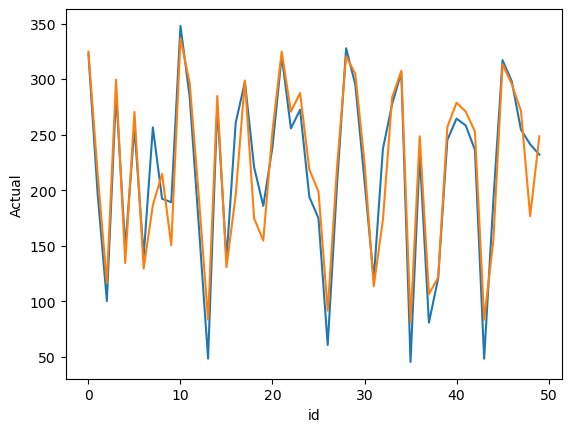

In [28]:
sns.lineplot(x='id',y='Actual',data = Results.head(50))
sns.lineplot(x='id',y='Predicted',data = Results.head(50))

plt.plot()

In [29]:
import pickle
pickle.dump(Model,open('test','wb'))

In [30]:
model = pickle.load(open('test','rb'))

In [32]:
r1 = [[15,5.7,190,470,250,430,83.9,4783,1852,1448,2856,2605,555,470,1,0,0,0,0,0,0,1]]
hh = model.predict(r1)
hh[0]

C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


67.5

In [33]:
Tesla1 = [20,4.4,233,485,366,493,82,4694,1849,1443,2875,2232,388,561,0,0,1,0,0,1,0,0]
Tesla1_1 = [50,4.4,233,485,366,493,82,4694,1849,1443,2875,2232,388,561,0,0,1,0,0,1,0,0]
Tesla2 = [35,3.3,261,460,377,660,82,4694,1849,1443,2875,2232,388,561,0,0,0,1,0,1,0,0]
BMW = [45,5.7,190,470,250,430,83.9,4783,1852,1448,2856,2605,555,470,1,0,0,0,0,0,0,1]
Volkswagen = [60,7.9,160,450,150,310,82,4261,1809,1568,2771,2300,447,385,0,0,0,0,1,0,0,1]
Polestar = [70,7.4,160,425,170,330,78,4607,1800,1479,2735,2490,496,405,0,1,0,0,0,0,1,0]

In [38]:
# Tesla1 = [20,4.4,233,485,366,493,82,4694,1849,1443,2875,2232,388,561,350000,0,0,1,0,0,1,0,0]
# Tesla2 = [35,3.3,261,460,377,660,82,4694,1849,1443,2875,2232,388,561,100000,0,0,0,1,0,1,0,0]
# BMW = [45,5.7,190,470,250,430,83.9,4783,1852,1448,2856,2605,555,470,600000,1,0,0,0,0,0,0,1]
# Volkswagen = [60,7.9,160,450,150,310,82,4261,1809,1568,2771,2300,447,385,25000,0,0,0,0,1,0,0,1]
# Polestar = [70,7.4,160,425,170,330,78,4607,1800,1479,2735,2490,496,405,150000,0,1,0,0,0,0,1,0]

In [34]:
battery_levels = [15,20,25,35,45,50,60,75,85]
vehicles = [Tesla1,Tesla2,BMW,Volkswagen,Polestar]
b=0
for vehicle in vehicles:
    if b==0:
        print("Tesla1")
    elif b==1:
        print("Tesla2")
    elif b==2:
        print("BMW")
    elif b==3:
        print("Volkswagan")
    else:
        print("Polestar")
    for bvalue in battery_levels:
        vehicle[0]=bvalue
        
        print("BL:" + str(bvalue) + " range: " + str(model.predict([vehicle])[0]))
    b+=1

Tesla1
BL:15 range: 69.5
BL:20 range: 85.5
BL:25 range: 101.5
BL:35 range: 133.5
BL:45 range: 165.5
BL:50 range: 181.5
BL:60 range: 213.5
BL:75 range: 261.5
BL:85 range: 293.5
Tesla2
BL:15 range: 70.0
BL:20 range: 86.0
BL:25 range: 102.0
BL:35 range: 134.5
BL:45 range: 166.5
BL:50 range: 182.5
BL:60 range: 214.5
BL:75 range: 262.5
BL:85 range: 294.5
BMW
BL:15 range: 67.5
BL:20 range: 83.5
BL:25 range: 99.5
BL:35 range: 131.5
BL:45 range: 163.5
BL:50 range: 179.5
BL:60 range: 211.5
BL:75 range: 259.5
BL:85 range: 291.5
Volkswagan
BL:15 range: 65.5
BL:20 range: 81.5
BL:25 range: 97.5
BL:35 range: 130.5
BL:45 range: 162.5
BL:50 range: 178.5
BL:60 range: 210.5
BL:75 range: 258.5
BL:85 range: 290.5
Polestar
BL:15 range: 68.5
BL:20 range: 84.5
BL:25 range: 100.5
BL:35 range: 133.5
BL:45 range: 165.5
BL:50 range: 181.5
BL:60 range: 213.5
BL:75 range: 261.5
BL:85 range: 293.5


C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not ha

In [35]:
from sklearn.linear_model import Ridge 
# training model with 0.5 alpha value 
ridge_model = Ridge(alpha = 0.5, tol = 0.001,solver ='auto', random_state = 42) 
ridge_model.fit(X_train, y_train) 

# predicting the y_test 
ridge_y_pred = ridge_model.predict(X_test) 
  
# finding score for our model 
score = ridge_model.score(X_test, ridge_y_pred ) 
# print("\n\nRidge Model score : ", score) 

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,ridge_y_pred)

0.887817089235253

In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,ridge_y_pred)
mse

783.2576055256555

In [38]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_value = mape(y_test,ridge_y_pred)
mape_value

0.17886512019951353

In [40]:
Ridge_Results= pd.DataFrame(columns=['Actual', 'Predicted']) 
Ridge_Results['Actual']=y_test
Ridge_Results['Predicted']=ridge_y_pred
#Results[km]x test['km'] 
Ridge_Results=Ridge_Results.reset_index() 
Ridge_Results['id']=Ridge_Results.index 
Ridge_Results.head(15)

,index,Actual,Predicted,id
0,1860,322.3425,323.334556,0
1,353,196.7850,213.240948,1
2,1333,100.3080,115.788429,2
3,905,287.2200,299.036718,3
4,1289,148.4640,135.035248,4
5,1273,256.4325,269.762981,5
6,938,140.6520,129.023150,6
7,1731,256.5720,185.399020,7
8,65,192.3450,213.240948,8
9,1323,189.1920,151.074264,9


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

[]

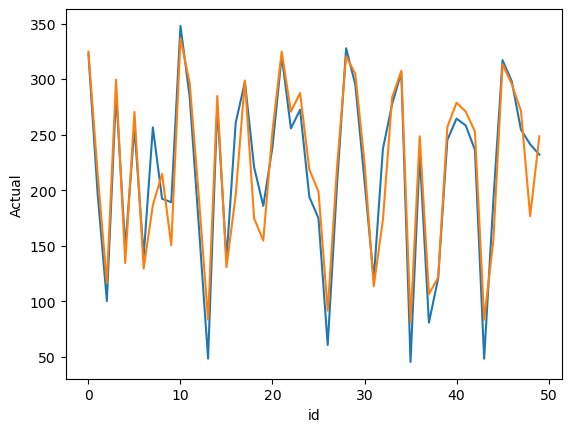

In [42]:
sns.lineplot(x='id',y='Actual',data = Results.head(50))
sns.lineplot(x='id',y='Predicted',data = Results.head(50))

plt.plot()

In [43]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.7)

# Fit the model to the training data
elastic_net.fit(X_train, y_train)


# Make predictions on the test data
elastic_net_y_pred = elastic_net.predict(X_test)


# Print the coefficients of the trained model
# print('Elastic Net coefficients:')
# print(elastic_net.coef_)

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test,elastic_net_y_pred)

0.8878280664278609

In [45]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,elastic_net_y_pred)
mse

783.1809631071368

In [46]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_value = mape(y_test,elastic_net_y_pred)
mape_value

0.17897286233721674

In [47]:
Elastic_Net_Results= pd.DataFrame(columns=['Actual', 'Predicted']) 
Elastic_Net_Results['Actual']=y_test
Elastic_Net_Results['Predicted']=elastic_net_y_pred
#Results[km]x test['km'] 
Elastic_Net_Results=Elastic_Net_Results.reset_index() 
Elastic_Net_Results['id']=Elastic_Net_Results.index 
Elastic_Net_Results.head(15)

,index,Actual,Predicted,id
0,1860,322.3425,323.293420,0
1,353,196.7850,213.246413,1
2,1333,100.3080,115.801712,2
3,905,287.2200,298.979400,3
4,1289,148.4640,135.040667,4
5,1273,256.4325,269.713353,5
6,938,140.6520,129.035296,6
7,1731,256.5720,185.414242,7
8,65,192.3450,213.246413,8
9,1323,189.1920,151.073129,9


C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

[]

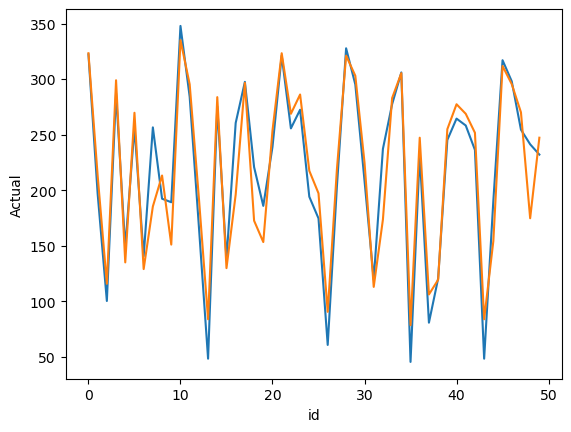

In [48]:
sns.lineplot(x='id',y='Actual',data = Elastic_Net_Results.head(50))
sns.lineplot(x='id',y='Predicted',data = Elastic_Net_Results.head(50))

plt.plot()

In [50]:
Results + Ridge_Results + Elastic_Net_Results

,index,Actual,Predicted,id
0,5580,967.0275,971.377976,0
1,1059,590.3550,641.237361,3
2,3999,300.9240,348.090141,6
3,2715,861.6600,897.516118,9
4,3867,445.3920,404.575915,12
...,...,...,...,...
395,2895,610.1775,657.158726,1185
396,3852,625.7025,684.590490,1188
397,5217,914.5350,914.892202,1191
398,783,307.6200,323.565603,1194


In [62]:
final_results=pd.DataFrame()
final_results['Actual'] = y_test
final_results['Linear_pred'] = y_pred
final_results['Ridge_pred'] = ridge_y_pred
final_results['ElasticNet_Pred'] = elastic_net_y_pred
final_results=final_results.reset_index() 
final_results['id']=final_results.index 
final_results.head(20)

,index,Actual,Linear_pred,Ridge_pred,ElasticNet_Pred,id
0,1860,322.3425,324.75,323.334556,323.293420,0
1,353,196.7850,214.75,213.240948,213.246413,1
2,1333,100.3080,116.50,115.788429,115.801712,2
3,905,287.2200,299.50,299.036718,298.979400,3
4,1289,148.4640,134.50,135.035248,135.040667,4
5,1273,256.4325,270.50,269.762981,269.713353,5
6,938,140.6520,129.50,129.023150,129.035296,6
7,1731,256.5720,186.75,185.399020,185.414242,7
8,65,192.3450,214.75,213.240948,213.246413,8
9,1323,189.1920,150.50,151.074264,151.073129,9
